<a href="https://colab.research.google.com/github/ricopahlevi/Data-Mining/blob/main/UTS_DATA_MiningAchmad_Khairico_Pahlevi_211011401913.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

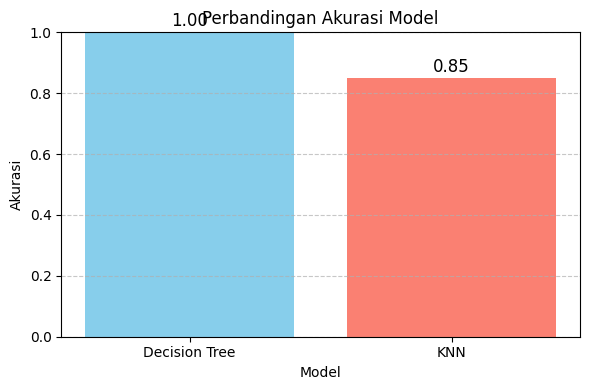

Akurasi Decision Tree: 1.0
Akurasi KNN: 0.85
Decision Tree lebih akurat.


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Baca file Excel (pastikan file sudah diunggah ke Colab dan berada di folder yang sama)
df = pd.read_excel("data_pelanggan.xlsx")

import matplotlib.pyplot as plt

# Data akurasi untuk visualisasi
models = ['Decision Tree', 'KNN']
accuracies = [acc_dt, acc_knn]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan nilai akurasi di atas batang
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


# Label encoding untuk kolom target
le = LabelEncoder()
df['loyalitas'] = le.fit_transform(df['loyalitas'])  # Loyal = 1, Tidak Loyal = 0

# Pisahkan fitur dan target
X = df.drop(columns=['loyalitas'])
y = df['loyalitas']

# Bagi data ke data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# K-Nearest Neighbor
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

# Cetak hasil
print("Akurasi Decision Tree:", acc_dt)
print("Akurasi KNN:", acc_knn)

if acc_dt > acc_knn:
    print("Decision Tree lebih akurat.")
elif acc_knn > acc_dt:
    print("KNN lebih akurat.")
else:
    print("Keduanya sama akurat.")